In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


In [3]:
# Load data
df = pd.read_csv('Mall_Customers.csv')

# View structure
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())

# Summary statistics
print("\nDescribe:\n", df.describe())


Shape: (200, 5)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Missing Values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Duplicates: 0

Describe:
        CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007     

In [4]:
# For clustering, select relevant features:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

X = df[features]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


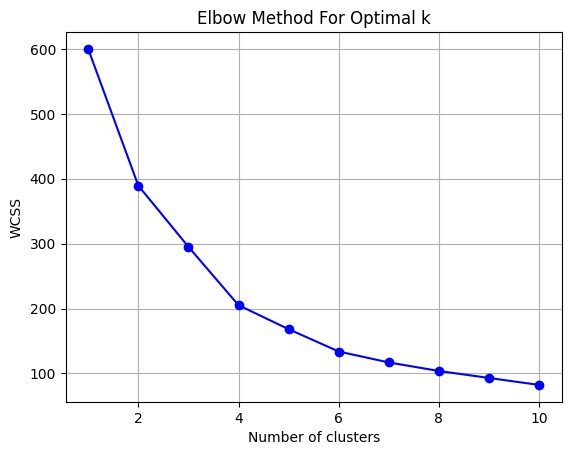

In [5]:
wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow
plt.plot(k_range, wcss, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()


In [6]:
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"Silhouette Score for k={k}: {score:.3f}")


Silhouette Score for k=2: 0.335
Silhouette Score for k=3: 0.358
Silhouette Score for k=4: 0.404
Silhouette Score for k=5: 0.417
Silhouette Score for k=6: 0.428


In [7]:
# Assume from elbow plot, optimal k = 5 (adjust if plot says otherwise)
k_opt = 5

kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to DataFrame
df['Cluster'] = cluster_labels


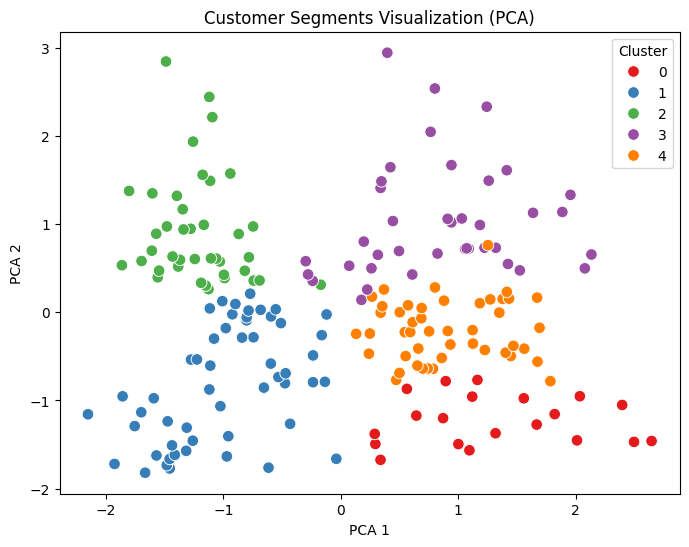

In [8]:
# Reduce features to 2D for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette='Set1', s=70)
plt.title('Customer Segments Visualization (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()


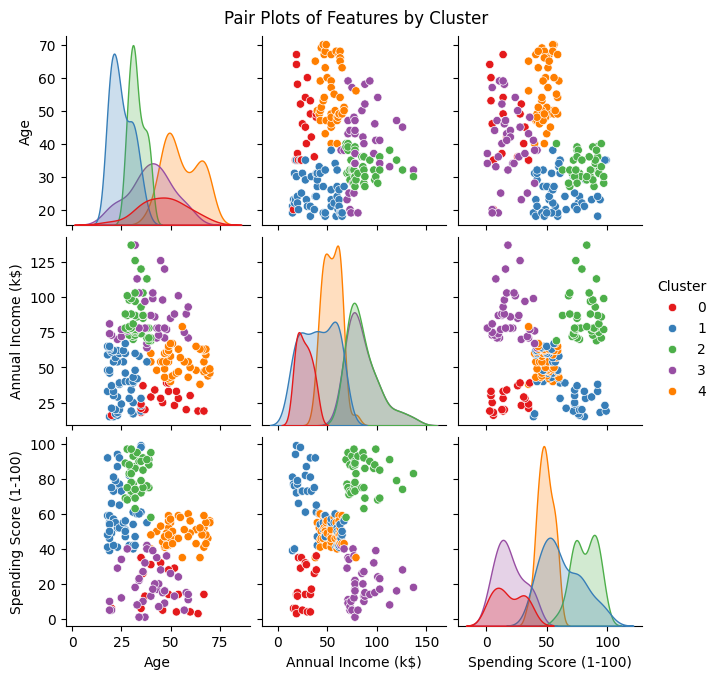

In [9]:
# For large datasets, sample for faster plotting, else plot all
sns.pairplot(df[features + ['Cluster']], hue='Cluster', palette='Set1', diag_kind='kde', height=2.2)
plt.suptitle('Pair Plots of Features by Cluster', y=1.02)
plt.show()


In [10]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_df = pd.DataFrame(centers, columns=features)
print("\nCluster Centroids:\n", centroid_df)



Cluster Centroids:
          Age  Annual Income (k$)  Spending Score (1-100)
0  46.250000           26.750000               18.350000
1  25.185185           41.092593               62.240741
2  32.875000           86.100000               81.525000
3  39.871795           86.102564               19.358974
4  55.638298           54.382979               48.851064


In [11]:
# Save to csv
df.to_csv('Mall_Customers_Clustered.csv', index=False)


In [12]:
# Profile clusters
profile = df.groupby('Cluster')[features].mean()
profile['Count'] = df['Cluster'].value_counts()
print("\nCluster Profiles:\n", profile)



Cluster Profiles:
                Age  Annual Income (k$)  Spending Score (1-100)  Count
Cluster                                                              
0        46.250000           26.750000               18.350000     20
1        25.185185           41.092593               62.240741     54
2        32.875000           86.100000               81.525000     40
3        39.871795           86.102564               19.358974     39
4        55.638298           54.382979               48.851064     47
